# Purpose of Notebook
This Notebook shows the basic mechanics of the environment and how to use the game

As mentioned before, the best way to get to know the game is just to download it and play through the introduction in-app. Otherwise, consider [Drop7's Wikipedia](https://en.wikipedia.org/wiki/Drop7)

In [1]:
import sys 
sys.path.append('..') #hack to import module from parent folder
import numpy as np
import gym
import gym_drop7
import cfg
import matplotlib.pyplot as plt

In [2]:
# general command to setup the enviroment
env = gym.make('Drop7-v0')

/home/j-vangoey/.pyenv/versions/3.11.9/envs/drop7/lib/python3.11/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment Drop7-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/home/j-vangoey/.pyenv/versions/3.11.9/envs/drop7/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (7, 7)
  logger.warn(


## Environment
As seen below an observation is a tuple of the following:
- number to insert next. This is the value of the block to insert next. (in this example it would be a block of value 7 - changes if reevaluated).
- Current grid in form of a numpy array

In [3]:
# reset episode variables and receive first observation
print(env.reset())

/home/j-vangoey/.pyenv/versions/3.11.9/envs/drop7/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/j-vangoey/.pyenv/versions/3.11.9/envs/drop7/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/j-vangoey/.pyenv/versions/3.11.9/envs/drop7/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:149: UserWarning: WARN: The obs returned by the `reset()` method was expecting a tuple, actual type: <class 'int'>
  logger.warn(f"{pre} was expecting a tuple, actual type: {type(obs)}")


TypeError: object of type 'int' has no len()

None


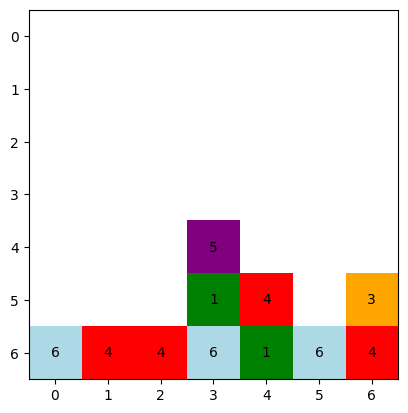

In [ ]:
# print the environment nicely
print(env.render())

### Stepping through the game
Stepping through the game is simple: We only need to specify in which column to insert the next block (similar to tetris, but without the rotation). This is done by calling env.step with the index of the column.
The step function returns:
- block to insert next
- observation array
- reward of last action
- game_over (bool)
- diagnosis dictionary

In [ ]:
env.step(5)

/home/j-vangoey/.pyenv/versions/3.11.9/envs/drop7/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/j-vangoey/.pyenv/versions/3.11.9/envs/drop7/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/j-vangoey/.pyenv/versions/3.11.9/envs/drop7/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: int64
  logger.warn(
/home/j-vangoey/.pyenv/versions/3.11.9/envs/drop7/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` metho

((3,
  array([[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 5, 0, 1, 3],
         [6, 0, 0, 6, 0, 6, 4]])),
 303,
 False,
 {})

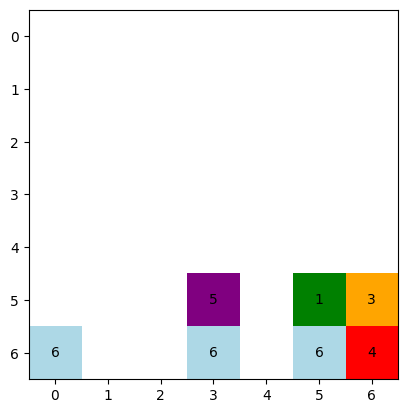

In [ ]:
env.render()

## Small problem
The initiation of the game is random - therefore we might gain an advantage by chance. This random initiation is the "classic" mode of the game. That's why we implemented version "sequence" as "v1" of the environment, which always starts with a row of -2:

In [ ]:
env = gym.make('Drop7-v1')

In [ ]:
env.render()

ResetNeeded: Cannot call `env.render()` before calling `env.reset()`, if this is a intended action, set `disable_render_order_enforcing=True` on the OrderEnforcer wrapper.